In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/crypto_data.csv")
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
mask = df['IsTrading'] == True
df = df[mask]
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
df = df.drop(['IsTrading','CoinName','Unnamed: 0'],1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
1243,Ethash,PoW,NaN,1000000000
1244,SHA-256,DPoI,NaN,1000000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [5]:
df = df.dropna(how="any").reset_index(drop=True)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,Scrypt,PoW/PoS,1.055185e+09,532000000
2,SHA-256,PoW/PoS,0.000000e+00,0
3,X13,PoW/PoS,2.927942e+10,314159265359
4,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
680,SHA-256,DPoS,2.000000e+09,2000000000
681,Scrypt,PoW/PoS,1.493105e+07,250000000
682,CryptoNight,PoW,9.802226e+08,1400222610
683,Equihash,PoW,7.296538e+06,21000000


In [6]:
mask = df.TotalCoinsMined > 0
df = df[mask].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 16.8+ KB


In [7]:
df["TotalCoinSupply"] = pd.to_numeric(df.TotalCoinSupply)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 16.8+ KB


In [8]:
coin_df = pd.get_dummies(df)
coin_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(coin_df.loc[:, ["TotalCoinsMined", "TotalCoinSupply"]])

coin_df.loc[:, ["TotalCoinsMined", "TotalCoinSupply"]] = scaler.transform(coin_df.loc[:, ["TotalCoinsMined", "TotalCoinSupply"]])
coin_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.114747,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(coin_df)
tsne_features.shape

(532, 2)

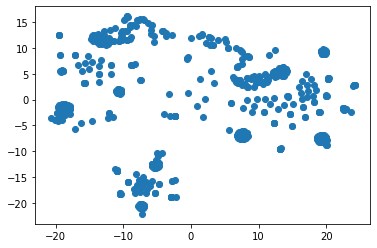

In [13]:
import matplotlib.pyplot as plt

plt.scatter(tsne_features[:,0],tsne_features[:,1])
plt.show()

In [17]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(coin_df)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[4.85711723e-01 1.12085377e-01 8.45179797e-02 7.28289957e-02
 5.75001556e-02 3.17539130e-02 1.97054094e-02 9.68976788e-03
 8.91168603e-03 8.21674775e-03 7.68671475e-03 6.28043049e-03
 5.82401097e-03 5.28201908e-03 4.90914712e-03 4.80268224e-03
 4.27323423e-03 3.58889250e-03 3.06133933e-03 2.57417323e-03
 2.13926107e-03 2.13926107e-03 2.13925301e-03 2.13860288e-03
 2.12577658e-03 2.04688921e-03 1.84019746e-03 1.74489601e-03
 1.63945343e-03 1.60443454e-03 1.59977954e-03 1.52419036e-03
 1.38448462e-03 1.28487615e-03 1.08441744e-03 1.06963054e-03
 1.06963054e-03 1.06963054e-03 1.06963054e-03 1.06963054e-03
 1.06963054e-03 1.06963054e-03 1.06750977e-03 1.06217193e-03
 1.05410375e-03 1.02143825e-03 9.87563103e-04 8.42282818e-04
 7.07613950e-04 5.34815268e-04 5.34815268e-04 5.34815268e-04
 5.34815268e-04 5.34815268e-04 5.34815268e-04 5.34815268e-04
 5.34815268e-04 5.34815268e-04 5.34815268e-04 5.34815268e-04
 5.34815268e-04 5.34815268e-04 5.34815268e-04 5.34815268e-04
 5.34815268e-04 5.348152

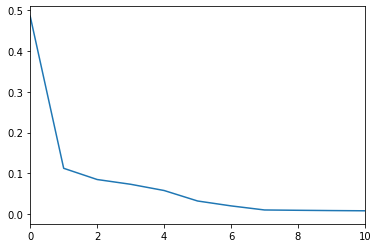

In [18]:

plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlim(0,10)
plt.show()

In [19]:
pca = PCA(n_components=0.9)
pca.fit(coin_df)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.48571172 0.11208538 0.08451798 0.072829   0.05750016 0.03175391
 0.01970541 0.00968977 0.00891169 0.00821675 0.00768671 0.00628043]
0.9048889000766701


In [21]:
df_pca = pca.transform(coin_df)
df_pca = pd.DataFrame(df_pca, columns = ["PCA"+ str(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)])
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,-0.209276,-0.801765,0.172975,-0.672385,-0.028027,-0.027350,0.002161,-0.016859,-0.047423,-0.023043,-0.007850,0.015789
1,-0.187390,-0.804259,0.162555,-0.673029,-0.028782,-0.027213,0.002265,-0.017852,-0.047565,-0.023081,-0.007752,0.015888
2,3.529674,-0.305537,2.915403,0.414815,-0.163323,-0.259278,-0.278472,-0.152434,0.747395,0.360814,-0.233801,-0.070220
3,-0.180157,0.694290,-0.165771,0.239931,-0.278380,-0.614707,0.624124,-0.015063,0.027769,0.009259,-0.026164,-0.026461
4,-0.173289,0.688569,-0.154390,0.131918,-0.212548,-0.104388,-0.242103,0.002800,0.113068,-0.125626,0.058157,-0.129333


In [22]:
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)
tsne_features.shape

(532, 2)

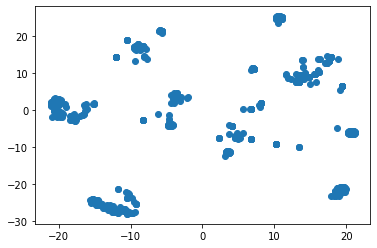

In [23]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

C:\Users\Greyson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


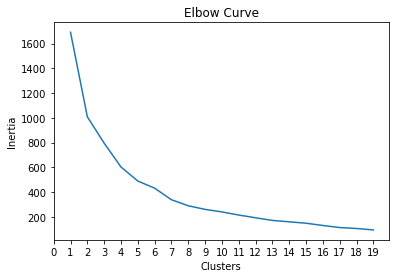

In [25]:
from sklearn.cluster import KMeans 
inertia = []
k = list(range(1, 20))

for i in k:
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(df_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(20)))
plt.title('Elbow Curve')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
model = KMeans(n_clusters=6, random_state=1)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

# Add the predicted class column to the dataframe
df_pca["class"] = model.labels_
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,class
0,-0.209276,-0.801765,0.172975,-0.672385,-0.028027,-0.027350,0.002161,-0.016859,-0.047423,-0.023043,-0.007850,0.015789,5
1,-0.187390,-0.804259,0.162555,-0.673029,-0.028782,-0.027213,0.002265,-0.017852,-0.047565,-0.023081,-0.007752,0.015888,5
2,3.529674,-0.305537,2.915403,0.414815,-0.163323,-0.259278,-0.278472,-0.152434,0.747395,0.360814,-0.233801,-0.070220,0
3,-0.180157,0.694290,-0.165771,0.239931,-0.278380,-0.614707,0.624124,-0.015063,0.027769,0.009259,-0.026164,-0.026461,4
4,-0.173289,0.688569,-0.154390,0.131918,-0.212548,-0.104388,-0.242103,0.002800,0.113068,-0.125626,0.058157,-0.129333,4


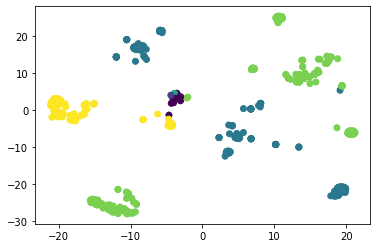

In [27]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=df_pca["class"])
plt.show()

In [28]:
df_pca["class"].value_counts() 

4    229
2    189
5    101
0     11
1      1
3      1
Name: class, dtype: int64